## **Statsmodels Overview and Practice**

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### **The Basics**

In [2]:
data = sm.datasets.get_rdataset("Guerry", "HistData").data
data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [3]:
data.columns

Index(['dept', 'Region', 'Department', 'Crime_pers', 'Crime_prop', 'Literacy',
       'Donations', 'Infants', 'Suicides', 'MainCity', 'Wealth', 'Commerce',
       'Clergy', 'Crime_parents', 'Infanticide', 'Donation_clergy', 'Lottery',
       'Desertion', 'Instruction', 'Prostitutes', 'Distance', 'Area',
       'Pop1831'],
      dtype='object')

In [4]:
# Fit OLS Regression
res = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.90e-08
Time:                        03:14:19   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [5]:
# Fitting OLS Regression using Numpy Arrays
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)

beta = [1, .1, .5] # coef
e = np.random.random(nobs) # error
y = np.dot(X, beta) + e

In [6]:
res_2 = sm.OLS(y, X).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     10.58
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           6.98e-05
Time:                        03:14:19   Log-Likelihood:                -8.8931
No. Observations:                 100   AIC:                             23.79
Df Residuals:                      97   BIC:                             31.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5186      0.069     22.072      0.0

In [7]:
print(dir(res))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_get_wald_nonlinear', '_is_nested', '_transform_predict_exog', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initiali

#### **Fitting an OLS Model**

In [8]:
from patsy import dmatrices

In [9]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = data[vars]
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  86 non-null     object
 1   Lottery     86 non-null     int64 
 2   Literacy    86 non-null     int64 
 3   Wealth      86 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 3.5+ KB


In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  85 non-null     object
 1   Lottery     85 non-null     int64 
 2   Literacy    85 non-null     int64 
 3   Wealth      85 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


**OLS:**

$\beta$	 = $\frac{x'y}{x'x}$	

- Variable 1: Exogenous/Independent/Regressor
- Variables 2: Endogenous/Dependent/Response/Regressand

Variable 1 ~ ($\sum_{}^{}$ Variables 2)

In [12]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', 
                 data=df, return_type='dataframe')

In [13]:
y.head()

,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0


In [14]:
X.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


In [15]:
# Describe Model
mod = sm.OLS(y, X)

# Fit Model
res = mod.fit()

# Summarize Model
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.07e-05
Time:                        03:14:19   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [16]:
print(res.params)
print("===============")
print(res.rsquared)

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64
0.3379508691928822


In [17]:
# Linear Rainbow = (F Stat, P Value)
sm.stats.linear_rainbow(res)

(0.847233997615691, 0.6997965543621644)

In [18]:
print(sm.stats.linear_rainbow.__doc__)


    Rainbow test for linearity

    The null hypothesis is the fit of the model using full sample is the same
    as using a central subset. The alternative is that the fits are difference.
    The rainbow test has power against many different forms of nonlinearity.

    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    frac : float, default 0.5
        The fraction of the data to include in the center model.
    order_by : {ndarray, str, List[str]}, default None
        If an ndarray, the values in the array are used to sort the
        observations. If a string or a list of strings, these are interpreted
        as column name(s) which are then used to lexicographically sort the
        data.
    use_distance : bool, default False
        Flag indicating whether data should be ordered by the Mahalanobis
        distance to the center.
    center : {float, int}, default None
        If a float, the value must be in [0, 1] a

The `plot_partregress` function is used to create a partial regression plot, visualizing the relationship between the dependent variable ('Lottery') and one independent variable ('Wealth') while controlling for the effects of other variables ('Region' and 'Literacy'). 'Wealth' is separate from the list ['Region', 'Literacy'] to show the partial relationship between 'Lottery' and 'Wealth' while holding the other variables constant. Each line in the plot represents this relationship for a specific level of the other variables, allowing the examination of how the 'Lottery-Wealth' relationship changes when considering the effects of 'Region' and 'Literacy.'

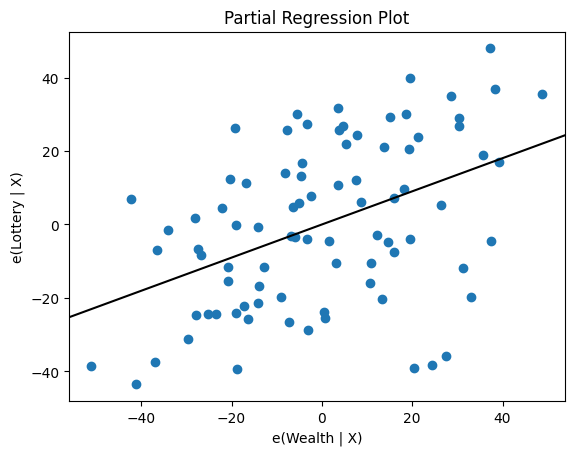

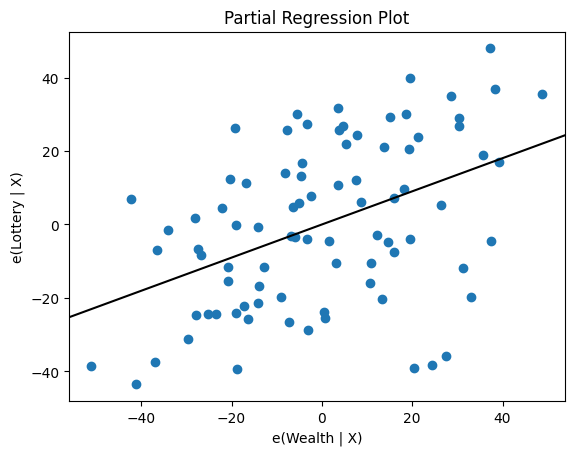

In [19]:
sm.graphics.plot_partregress("Lottery", 'Wealth',['Region', 'Literacy'],
                             data=df, obs_labels = False )

#### **R Style Model Fitting**

In [22]:
# To explicitly define Region as a categorical variable: 'C(variable)'
res_c = smf.ols(formula="Lottery ~ Literacy + Wealth + C(Region)", data=df).fit()
print(res_c.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.07e-05
Time:                        19:29:29   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.6517      9.456      4.

In [23]:
# To define a model and remove the constant from the equation: - 1
res_nc = smf.ols(formula="Lottery ~ Literacy + Wealth + C(Region) - 1", data=df).fit()
print(res_nc.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.07e-05
Time:                        19:30:36   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(Region)[C]    38.6517      9.456      4.087   

In [24]:
# Interactions: Matrix Version
res_int1 = smf.ols(formula="Lottery ~ Literacy:Wealth - 1", data=df).fit()
print(res_int1.summary())
print("==============")
print(res_int1.params)

                                 OLS Regression Results                                
Dep. Variable:                Lottery   R-squared (uncentered):                   0.542
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              99.33
Date:                Fri, 29 Dec 2023   Prob (F-statistic):                    6.79e-16
Time:                        19:32:16   Log-Likelihood:                         -419.22
No. Observations:                  85   AIC:                                      840.4
Df Residuals:                      84   BIC:                                      842.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [25]:
# Interactions between indivdual columns
res_int2 = smf.ols(formula="Lottery ~ Literacy*Wealth - 1", data=df).fit()
print(res_int2.summary())
print("==============")
print(res_int2.params)

                                 OLS Regression Results                                
Dep. Variable:                Lottery   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              122.3
Date:                Fri, 29 Dec 2023   Prob (F-statistic):                    3.55e-30
Time:                        19:32:49   Log-Likelihood:                         -380.15
No. Observations:                  85   AIC:                                      766.3
Df Residuals:                      82   BIC:                                      773.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [26]:
# Functions
res = smf.ols(formula="Lottery ~ np.log(Literacy)", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           0.000144
Time:                        19:34:35   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          115.6091     18.374  

In [30]:
def log_plus_1(x):
    return np.log(x + 1)

In [31]:
# Functions
res = smf.ols(formula="Lottery ~ log_plus_1(Literacy)", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           0.000144
Time:                        19:37:02   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              118.7162 

#### **Ordinary Least Squares**

In [40]:
import matplotlib.pyplot as plt 
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [33]:
# Fake Data
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [34]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [35]:
# Model fit and summary
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.265e+06
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.61e-240
Time:                        19:44:24   Log-Likelihood:                -143.56
No. Observations:                 100   AIC:                             293.1
Df Residuals:                      97   BIC:                             300.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2064      0.304      3.973      0.0

In [36]:
# Fake Data 2
nsample = 100
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.5, 0.5, -0.02, 5])
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) # Adds noise

In [38]:
res_2 = sm.OLS(y, X).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     408.4
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.67e-54
Time:                        19:48:54   Log-Likelihood:                -72.462
No. Observations:                 100   AIC:                             152.9
Df Residuals:                      96   BIC:                             163.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4520      0.019     23.442      0.0

In [39]:
print(f"Parameters: {res_2.params}")
print(f"Std Errors: {res_2.bse}")
print(f'Pred Values: {res_2.predict()}')
print(f'R Squared: {res_2.rsquared}')

Parameters: [ 0.45197692  0.47942715 -0.01511098  5.16047687]
Std Errors: [0.01928097 0.07450953 0.00169426 0.12501776]
Pred Values: [ 4.78270225  5.00011776  5.21238719  5.41575703  5.60678558  5.78248293
  5.94043259  6.07888975  6.19685227  6.29410142  6.3712108   6.429523
  6.47109498  6.49861443  6.51529042  6.52472291  6.5307563   6.53732309
  6.54828391  6.56727049  6.59753797  6.64183248  6.70227947  6.78029722
  6.87653919  6.99086743  7.12235819  7.26933947  7.42945908  7.59978027
  7.77690117  7.9570932   8.13645267  8.31105961  8.47713718  8.63120529
  8.77022213  8.89170795  8.99384584  9.0755557   9.13653814  9.17728664
  9.19906751  9.20386839  9.19431736  9.1735761   9.14521125  9.11304936
  9.08102128  9.05300221  9.03265416  9.02327692  9.02767394  9.04803822
  9.08586315  9.14188179  9.216037    9.30748381  9.41462377  9.53516996
  9.66624002  9.80447337  9.94616792 10.08743063 10.22433584 10.35308498
 10.47016102 10.57247159 10.65747468 10.72328208 10.76873618 10.79

In [46]:
def plot_compare(res):
    predict_std, iv_1, iv_y = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(x, y, 'o', label = 'data')
    ax.plot(x, y_true, 'b-', label='True')
    ax.plot(x, res.fittedvalues, 'r--', label = 'OLS')
    ax.plot(x, iv_1, 'g--')
    ax.plot(x, iv_y, 'g--', label = 'Error')
    ax.legend(loc = 'best')

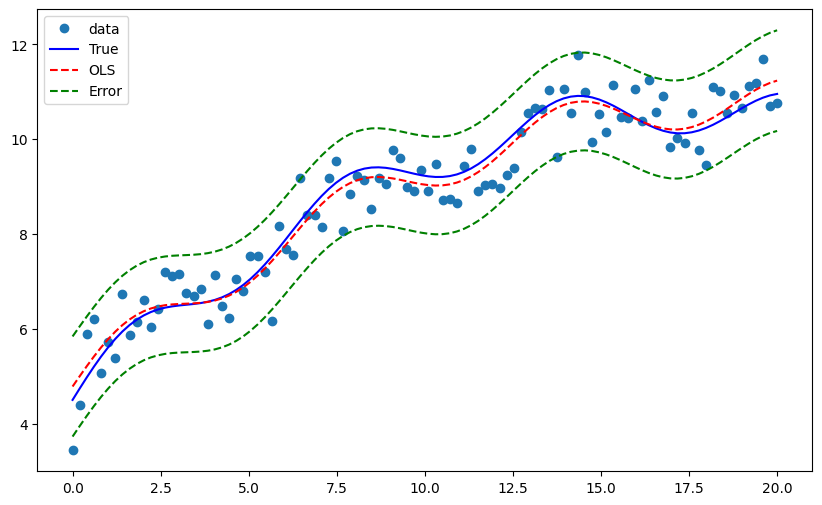

In [47]:
plot_compare(res_2)